<a href="https://colab.research.google.com/github/gatanabyan335-debug/Tugas-Deep-Learning-Lanjut/blob/main/Tugas_Deep_learning_lanjut_Gatan_Abyan_Atallansyah_41236710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Deep learning Lanjut**

**Nama:** Gatan Abyan Atallansyah

**Nim:** 41236710

**Kelas:** TI-KIP-P2-2023

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Fungsi untuk memuat (load) gambar dan mengubah ukurannya
def load_img(path_to_img):
    max_dim = 512 # Ukuran maksimum gambar, sesuaikan jika perlu
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Fungsi untuk menampilkan gambar
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

Saving gambar kucing.jpg to gambar kucing (11).jpg
Saving gambar batik.jpeg to gambar batik (8).jpeg


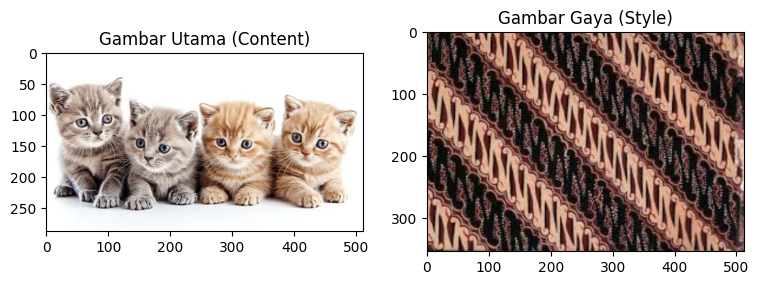

Memuat model...
Melakukan style transfer...


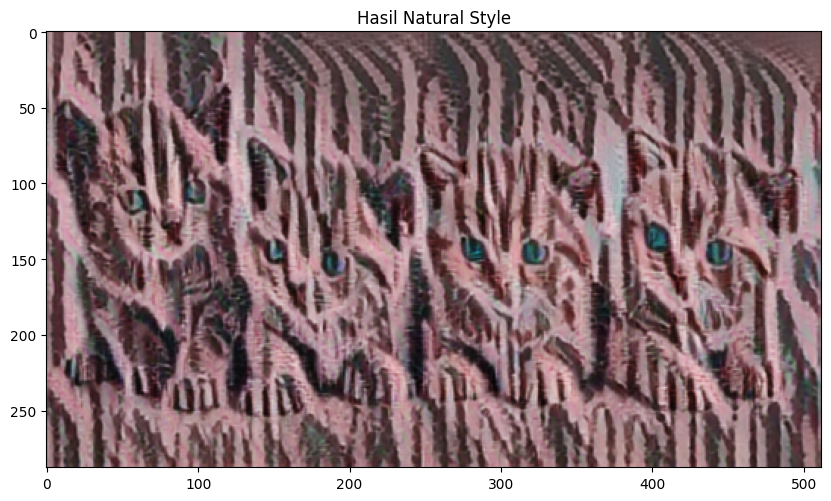

Gambar hasil telah disimpan sebagai: hasil_Natural_style.png


In [ ]:
# --- Upload Gambar ---

from google.colab import files
uploaded = files.upload()

content_image_name = 'content.jpg'
style_image_name = 'style.jpg'

if len(uploaded) == 2:
    keys = list(uploaded.keys())
    content_image_name = keys[0]
    style_image_name = keys[1]
elif len(uploaded) == 1:
    print("Hanya satu gambar yang di-upload. Pastikan Anda meng-upload dua gambar.")

# Muat Gambar ---
content_image = load_img(content_image_name)
style_image = load_img(style_image_name)

plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
imshow(content_image, 'Gambar Utama (Content)')

plt.subplot(1, 2, 2)
imshow(style_image, 'Gambar Gaya (Style)')
plt.show()

print("Memuat model...")
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

print("Melakukan style transfer...")
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

plt.figure(figsize=(10, 10))
imshow(stylized_image, 'Hasil Natural Style')
plt.show()

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

final_image = tensor_to_image(stylized_image)
final_image.save("hasil_style.png")
print("Gambar hasil telah disimpan sebagai: hasil_Natural_style.png")